In [60]:
import json
import os
import re
from collections import Counter
import pandas as pd
import seaborn as sns
from pathlib import Path

from src.data.make_dataset import CONSPIRACY_THEORIST_RE



In [61]:
comments = []
with open(os.path.join('../..', 'data', 'interim', 'RC_2009-09.jsonl'), encoding='utf8') as f:
    for line in f:
        comments.append(json.loads(line))

what is the distribution of subreddits labeling conspiracy theorists?

In [62]:
df = pd.DataFrame(Counter(map(lambda x: x['subreddit'], comments)).most_common())

In [63]:
df.columns=['subreddit', 'count']

In [64]:
df.head()

,subreddit,count
0,politics,63
1,reddit.com,52
2,AskReddit,37
3,conspiracy,30
4,science,25


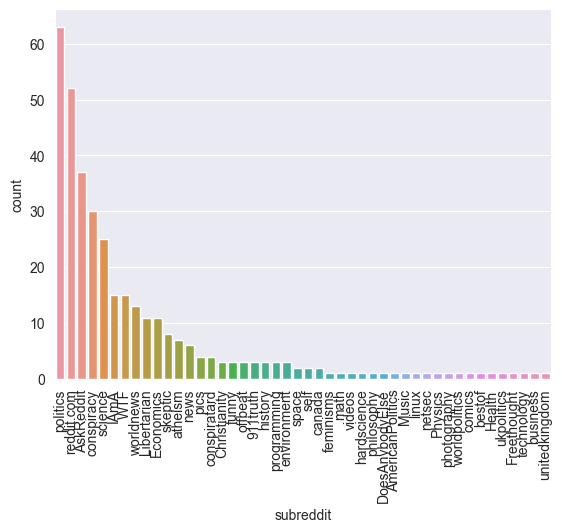

In [65]:
plt = sns.barplot(df, x='subreddit', y='count')
_=plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

In [66]:
comments_df = pd.DataFrame(comments)

In [67]:
comments_df.head()

,ups,parent_id,subreddit_id,distinguished,name,author_flair_text,created_utc,score_hidden,author_flair_css_class,retrieved_on,...,body,gilded,link_id,score,downs,author,id,edited,subreddit,controversiality
0,1,t1_c0cmwoy,t5_2qh4r,None,t1_c0cmxf5,None,1251767865,False,None,1426033725,...,"Think about it, you buffoon. You can't stop th...",0,t3_9ehvn,1,0,[deleted],c0cmxf5,True,conspiracy,0
1,5,t1_c0cmxpt,t5_2qh13,None,t1_c0cmyay,None,1251769251,False,None,1426033742,...,"Haha, let me show you how a conspiracy theoris...",0,t3_9fzox,5,0,BondsOfEarthAndFire,c0cmyay,False,worldnews,0
2,9,t3_9g0uk,t5_2qh0u,None,t1_c0cn6df,None,1251782883,False,None,1426033858,...,I always thought that driving the Google Stree...,0,t3_9g0uk,9,0,LieutenantClone,c0cn6df,False,pics,0
3,1,t1_c0cmxeo,t5_2qh6c,None,t1_c0cn6iy,None,1251783193,False,None,1426033860,...,"&gt;Start message boards about it, religiously...",0,t3_9fvfu,1,0,RexManningDay,c0cn6iy,True,Christianity,0
4,0,t1_c0cmtpn,t5_2qh63,None,t1_c0cncod,None,1251802766,False,None,1426034012,...,&gt;the conspiracy theorist in me wants to bel...,0,t3_9fwry,0,0,arguingwithidiots,c0cncod,False,Libertarian,0


In [122]:
def conspiracy_context(doc, context_half_length=50):
    wics = []
    doc = doc.replace('\n', '')

    for match in re.finditer(CONSPIRACY_THEORIST_RE, doc, flags=re.I | re.DOTALL | re.U | re.M):
        s, e = match.span()
        left_padding = " " * (context_half_length - (s - max(s-context_half_length, 0)))
        wics.append(left_padding+doc[max(s-context_half_length, 0):e+context_half_length])
    return wics


In [123]:
len(comments_df)

349

In [124]:
comments_df['label_in_context'] = comments_df.body.apply(conspiracy_context)

In [125]:
labels_df = comments_df.explode('label_in_context')

In [126]:
print('\n'.join(labels_df.sample(100)[['label_in_context', 'subreddit']].apply(lambda x:' '.join(x), axis=1)))

                                       God, those conspiracy theorists are fucking morons to say the least. If on Info  WTF
   I predicted that it would not be long before a conspiracy theorist would post something on this thread. math
 talk up global warming?  I really would like the conspiracy theorists to explain it to me. science
 a commercial Jet outside the pentagon. I'm not a conspiracy theorist, I just don't see any pictures of a plane. That d reddit.com
of that which you want to censor. Look at how the conspiracy theorist is laughed at. Look at how Ahmadinjad is minimali conspiracy
                                                  Conspiracy theorists called this a long time ago. politics
nd on 9/11? Could it have shot down United 93, as conspiracy theorists claim? Obtaining 30 hours of never-before-releas reddit.com
re scared! thats why you come on here and attack 'conspiracy theorists' and 'paultards.' thats why you kept insisting t environment
extremists.'Just a year ago I 